In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_excel("donnees/Data_Professional_Salary_Survey_Responses_1.xlsx")

data = data.dropna()

In [50]:
data.head(5)

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
1,2021,2020-12-10 08:23:22.242,145000.0,United States,76063,Microsoft SQL Server,15,Azure SQL DB (any flavor),Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2014,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
2,2021,2020-12-10 08:23:37.909,105000.0,United States,43240,Microsoft SQL Server,12,"PostgreSQL, Azure SQL DB (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2017,SQL Server 2008R2,300K-1M (large city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
4,2021,2020-12-10 08:24:03.600,98800.0,United States,468,Microsoft SQL Server,5,DB2,Full time employee,"Developer: Business Intelligence (SSRS, PowerB...",...,SQL Server 2019,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
6,2021,2020-12-10 08:24:45.351,100800.0,United States,60103,Microsoft SQL Server,14,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",...,SQL Server 2017,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1
8,2021,2020-12-10 08:25:12.965,105000.0,United States,46801,Microsoft SQL Server,10,DB2,Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2017,SQL Server 2012,100K-299K (city),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1


In [51]:
print(data.shape)
data = data.drop(data[data["YearsWithThisTypeOfJob"]>45].index)
data = data.drop(data[data["JobTitle"]=="Other"].index)
data = data.drop(data[data["PrimaryDatabase"]=="Other"].index)
print(data.shape)

(5756, 31)
(5601, 31)


In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, DBSCAN

# 1. Essai clustering

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

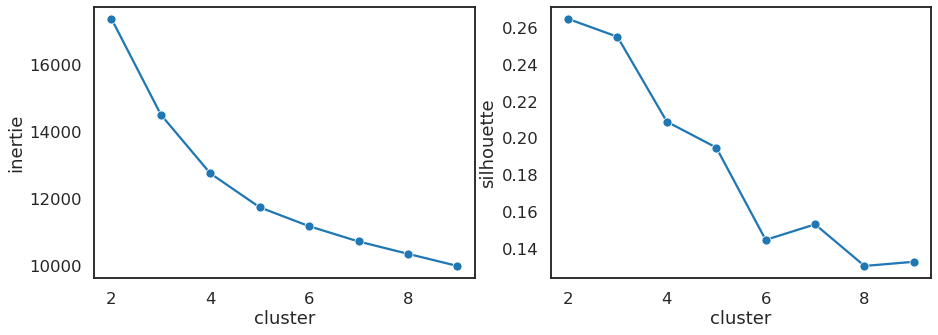

In [53]:
num_col = ["YearsWithThisTypeOfJob","SalaryUSD"]
cat_col = ["Country", "PrimaryDatabase", "JobTitle", "ManageStaff"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", OneHotEncoder(), cat_col)
])

k=4

X = full_pipeline.fit_transform(data)

nclusters = [i for i in range(2,10)]
inertie = []
silhouette = []

for n in nclusters :
    clustering = KMeans(n_clusters=n)
    clustering.fit(X)
    silhouette.append(silhouette_score(X,clustering.labels_))
    inertie.append(clustering.inertia_)

kmeans_metric = pd.DataFrame({'cluster':nclusters, 'silhouette':silhouette, 'inertie':inertie})


# Tracé
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.lineplot(data=kmeans_metric, x="cluster", y="inertie", marker='o')

plt.subplot(122)
sns.lineplot(data=kmeans_metric, x="cluster", y="silhouette", marker='o')


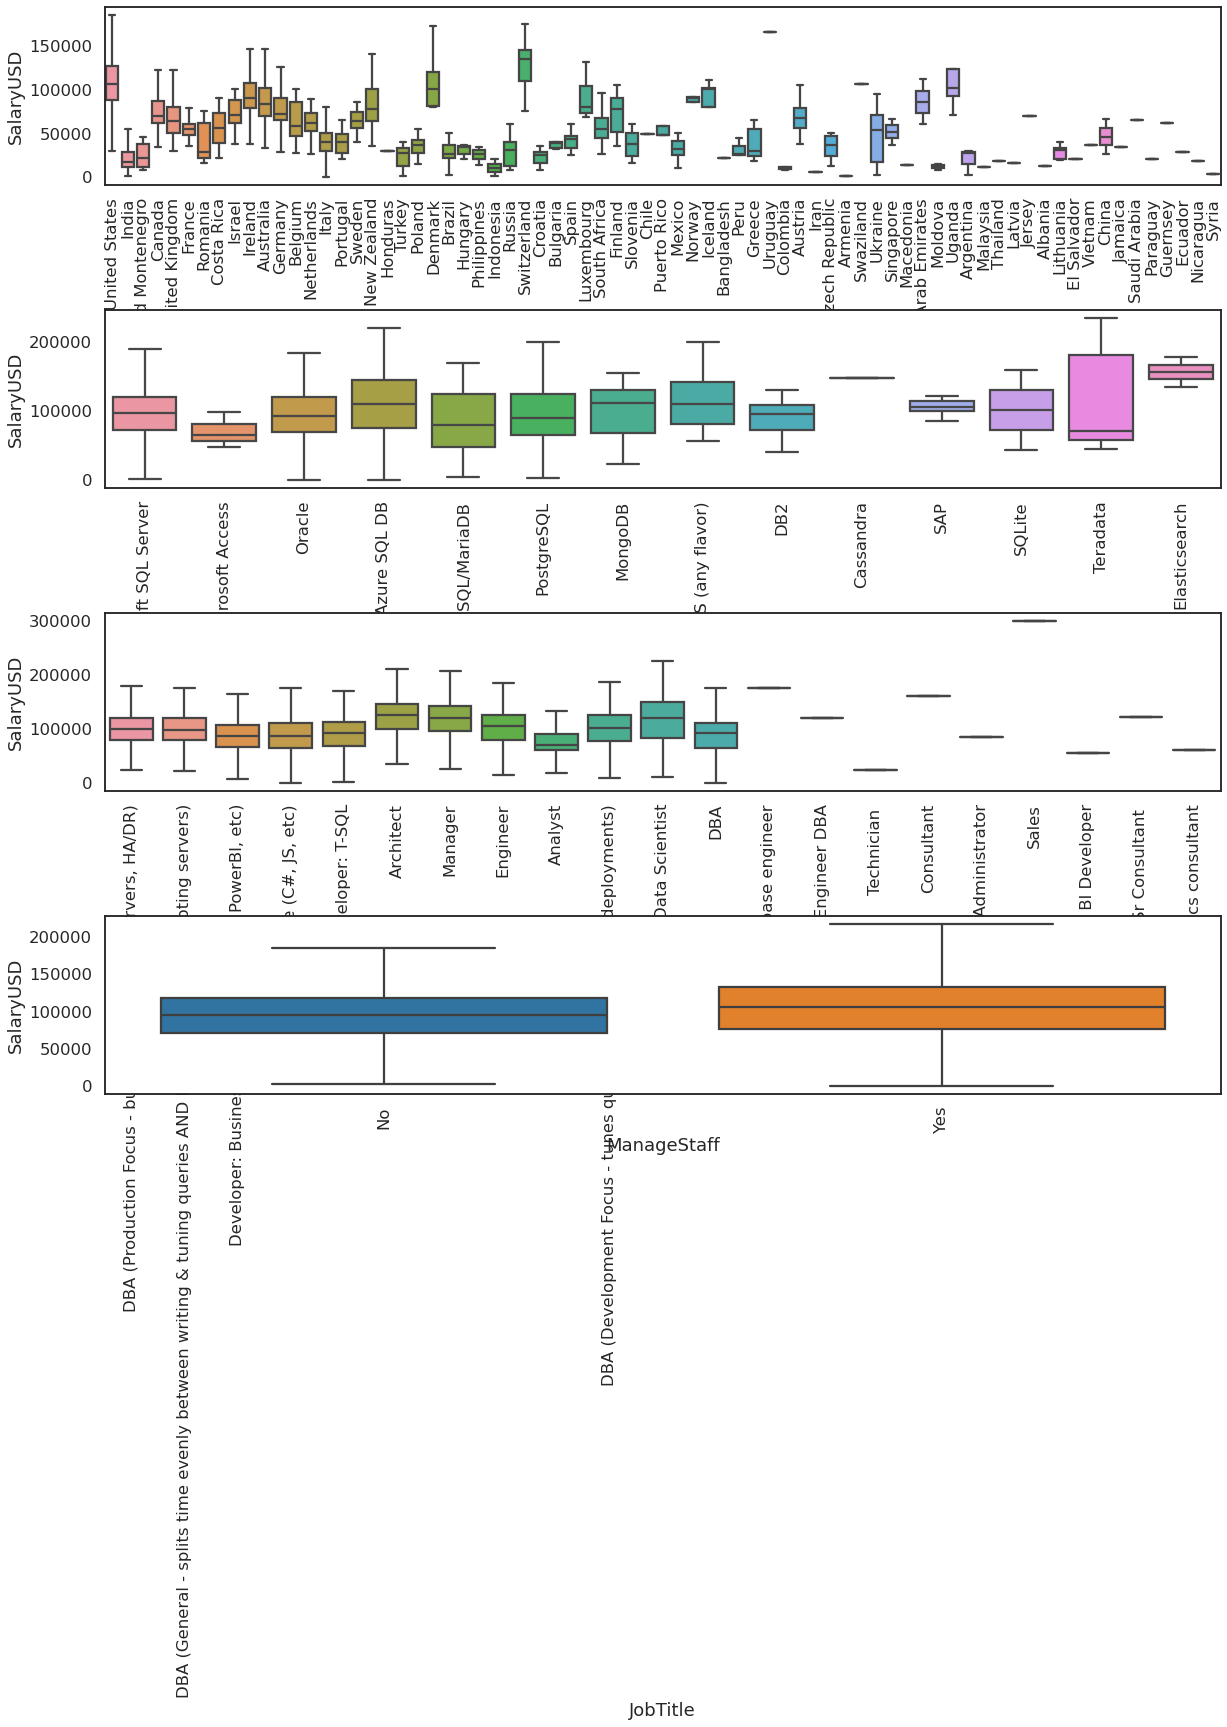

In [54]:
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(20,20))

plt.subplot(411)
sns.boxplot(data=data, x="Country", y="SalaryUSD", showfliers=False)
plt.xticks(rotation='vertical')

plt.subplot(412)
sns.boxplot(data=data, x="PrimaryDatabase", y="SalaryUSD", showfliers=False)
plt.xticks(rotation='vertical')

plt.subplot(413)
sns.boxplot(data=data, x="JobTitle", y="SalaryUSD", showfliers=False)
plt.xticks(rotation='vertical')

plt.subplot(414)
sns.boxplot(data=data, x="ManageStaff", y="SalaryUSD", showfliers=False)
plt.xticks(rotation='vertical')

plt.subplots_adjust(hspace=0.7)


# 2. Modèle de prédiction de salaire

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


num_col = ["YearsWithThisTypeOfJob"]
cat_col = ["Country", "PrimaryDatabase", "JobTitle", "ManageStaff"]

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_col),
    ("cat", OneHotEncoder(), cat_col)
])

k=4

X = full_pipeline.fit_transform(data)
y = data["SalaryUSD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Select a linear model
model = Regress()

# Train the model
model.fit(X_train, y_train)

metricforest = {'modèles': 'forest',
          'mean_absolute_error': mean_absolute_error(y_test, model.predict(X_test)),
          'mean_squared_error': mean_squared_error(y_test, model.predict(X_test)),
          'r2_score':r2_score(y_test, model.predict(X_test))
         }

metricforest



{'modèles': 'forest',
 'mean_absolute_error': 28052.514709801173,
 'mean_squared_error': 8402314816.72601,
 'r2_score': 0.037949669683081666}